# Project 9: Partial Correlations and Directed Acyclic Graphs


## Chains

Text(0.5, 1.0, 'Chain')

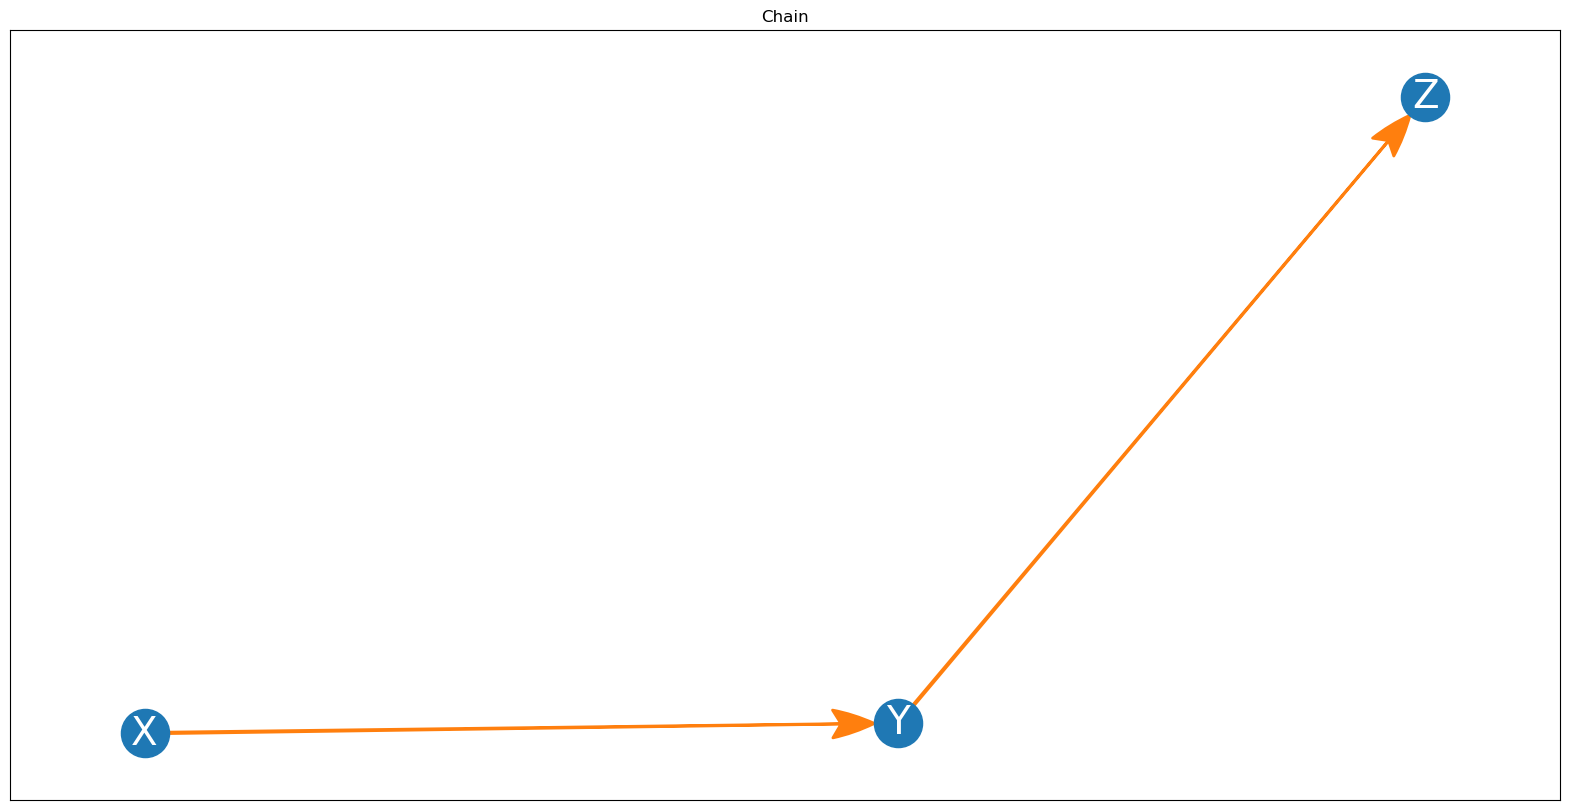

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle

# initiate graph object
G = nx.DiGraph()
G.add_edges_from([("X", "Y"), ("Y", "Z")])
pos = nx.spring_layout(G)
arrow_style = ArrowStyle("Fancy, head_length=3, head_width=2, tail_width=.1")
# graph
fig, ax = plt.subplots(figsize = (20,10))
nx.draw_networkx(G, pos, node_size = 1200,
                with_labels = True, arrows = True,
                font_color = "white",
                font_size = 28, alpha = 1,
                width = 2, edge_color = "C1",
                arrowstyle = arrow_style,
                ax = ax)
ax.set_title("Chain")

In [2]:
# import random
import numpy as np
import pandas as pd

length = 100000
cols = ["X", "Y", "Z"]
chain = {col:[] for col in cols}
for i in range(length):
    chain["X"].append(np.random.normal(0,1))
    chain["Y"].append(chain["X"][-1] * -1 + np.random.normal(0,2))
    chain["Z"].append(chain["Y"][-1] * .5 + np.random.normal(0,1))

chain = pd.DataFrame(chain)
chain.tail()

X         Y         Z
99995  0.132646  2.602117  1.830832
99996  1.174925 -2.732347 -1.806641
99997 -1.236301  2.069991  0.910798
99998  0.403136  4.032987  2.387291
99999 -1.602353  1.872272  0.963944

In [3]:
chain.corr()

X         Y         Z
X  1.000000 -0.447326 -0.335469
Y -0.447326  1.000000  0.743948
Z -0.335469  0.743948  1.000000

C:\Users\JLCat\githubrepositories\Learn-Python-for-Stats-and-Econ\In Class Demonstrations\datlib\plots.py:145: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  pd.plotting.scatter_matrix(data, c = c, alpha = alpha, s = 200 / num_vars, ax=ax)


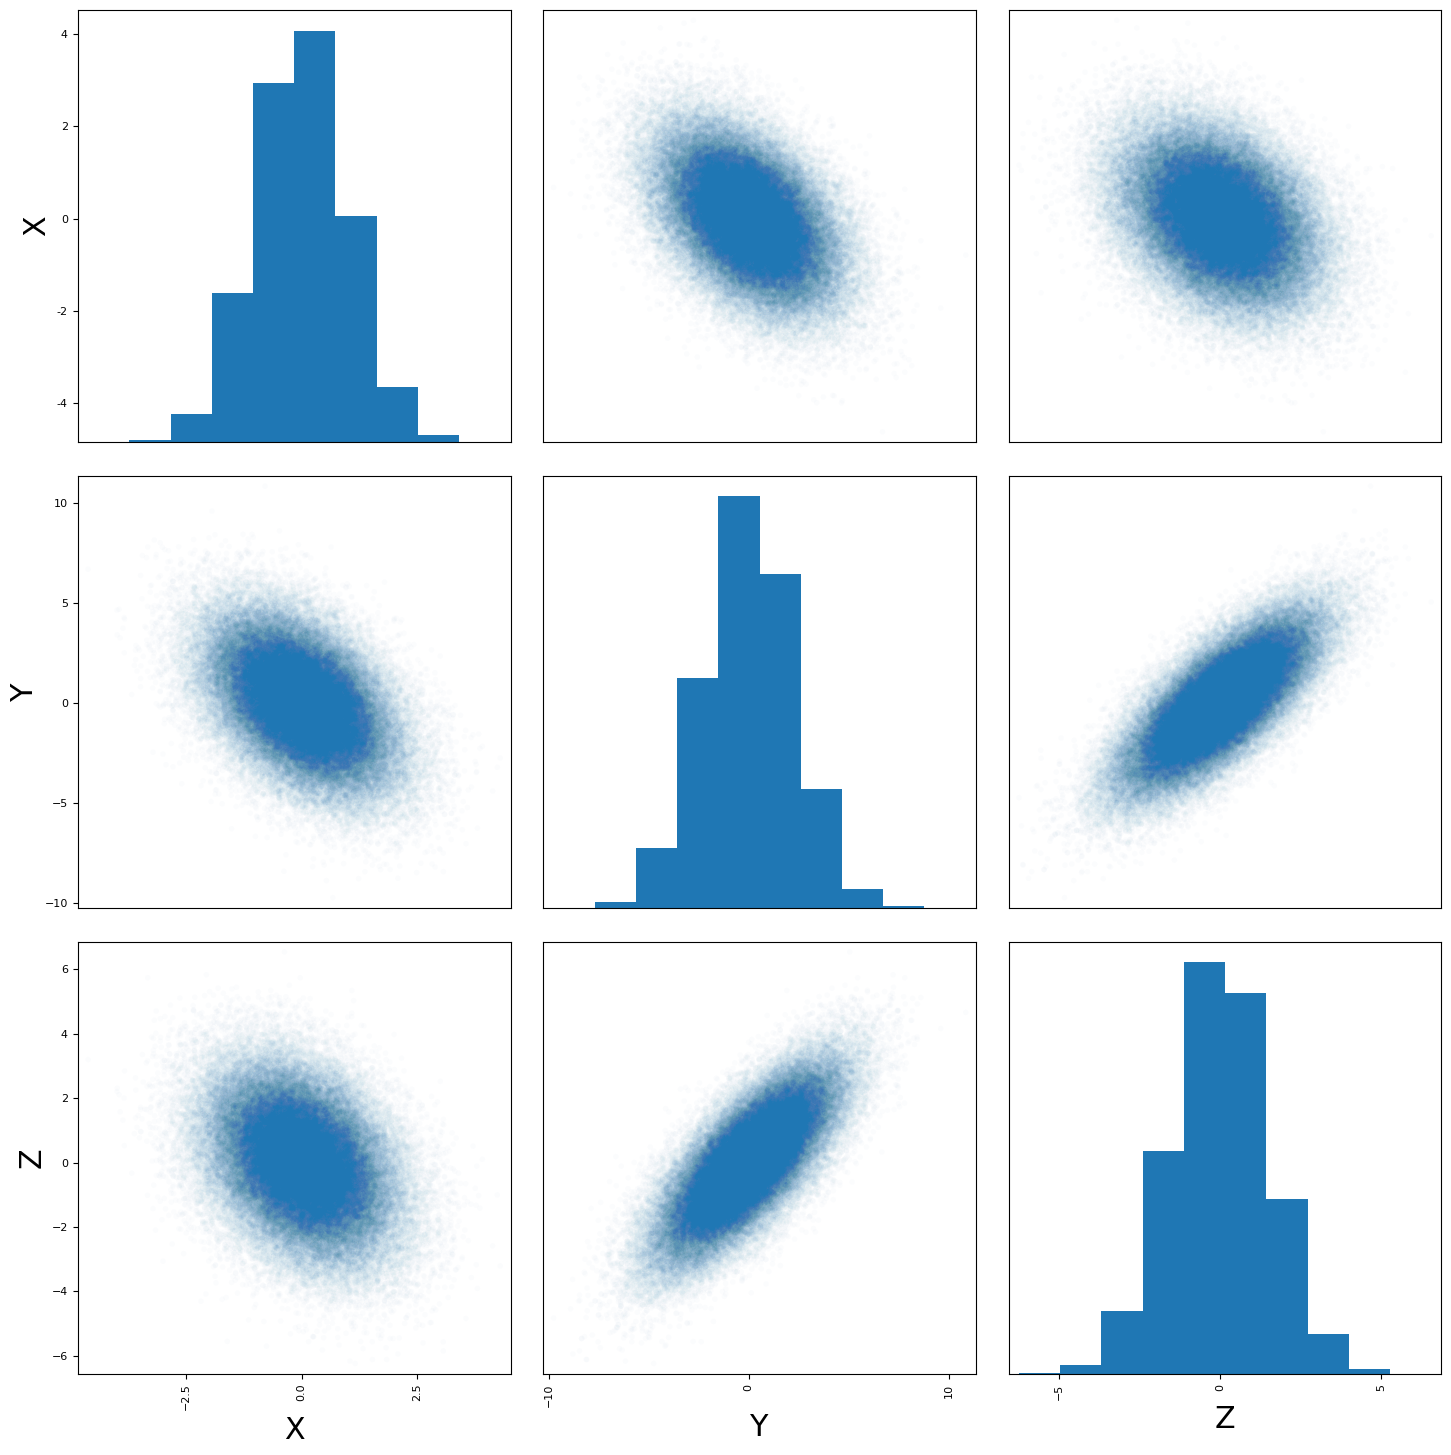

In [4]:
plt.rcParams.update({"font.size":30})
from datlib.plots import *
formatted_scatter_matrix(chain, alpha = 0.015)

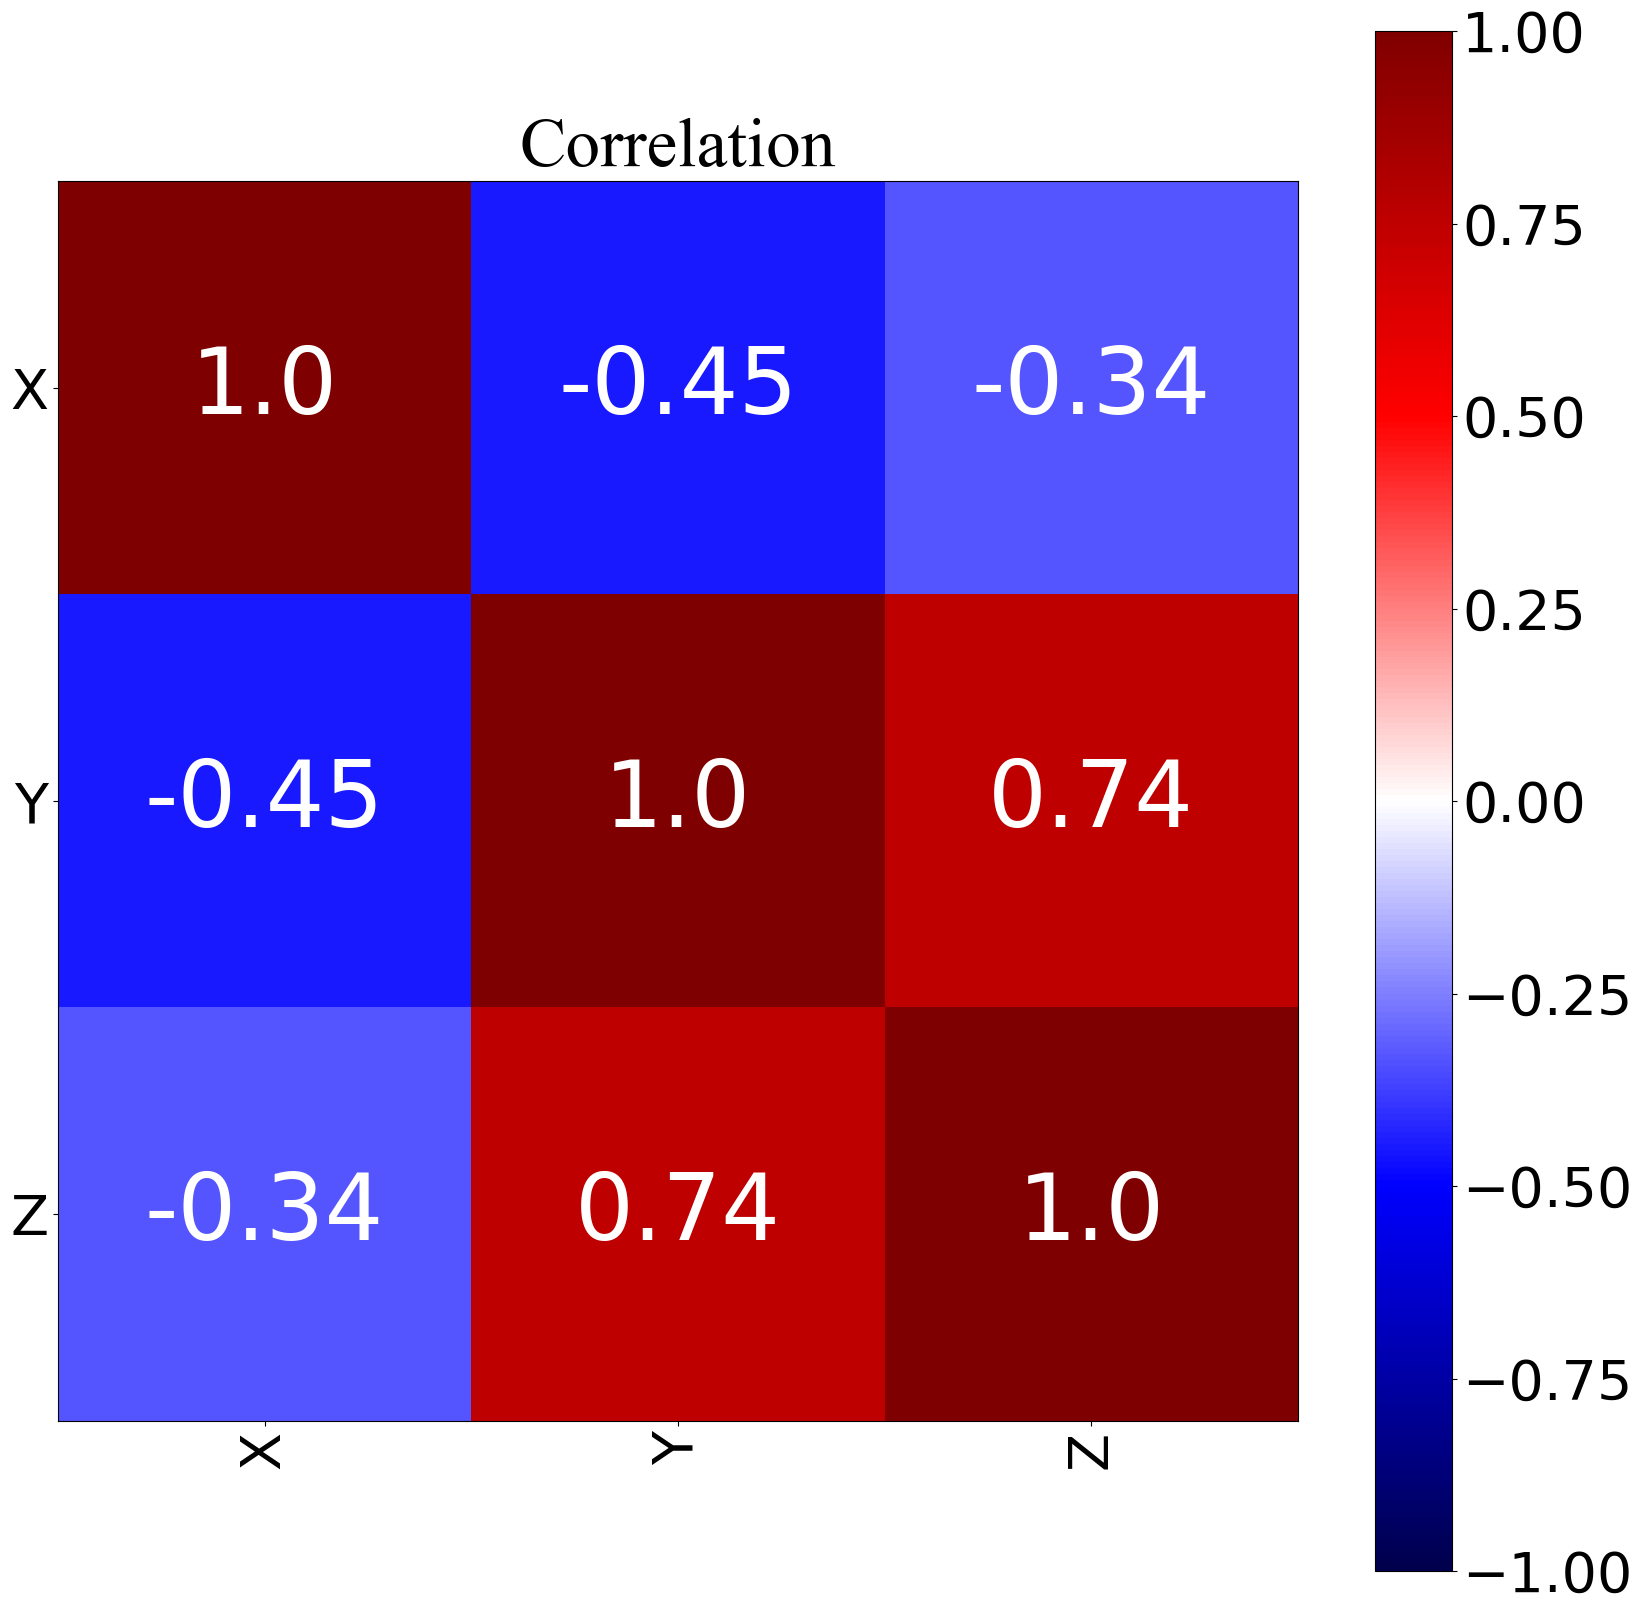

In [5]:
corr_matrix_heatmap(chain.corr(),
                    save_fig = False,
                    pp = None,
                    title = "Correlation")

If we control for $Y$, however, we see that that there is no longer any correlation between $X$ and $Z$. This is called a partial correlation. In the following matrix, partial correlations of each pair are calculated using the remaing variable as a control. We can interpret the result as:

$X \!\perp\!\!\!\perp Z|Y$ 

$Corr(X,Z|Y)\approx 0.00$

First, let's substantiate this intuition using an OLS regression. We run the regression for:

$X = \beta_0 + \beta_Y + \beta_Z + \epsilon_X$

In [6]:
import statsmodels.api as sm

Xc = chain[["X"]]
Xc["Constant"] = 1
Z = chain[["Z"]]

model = sm.OLS(Z, Xc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_14560\3806329196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                 1.268e+04
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:08:29   Log-Likelihood:            -1.7622e+05
No. Observations:              100000   AIC:                         3.524e+05
Df Residuals:                   99998   BIC:                         3.525e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X             -0.5042      0.004   -112.609      0.000      -0.513      -0.495
Constant      -0.0045      0.004     -1.001      0.317      -0.013       0.004
==============================================================================
Omnibus:                        0.768   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.765
Skew:                          -0.007   Prob(JB):                        0.682
Kurtosis:                       3.001   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:

XYc = chain[["Y", "X"]]
XYc["Constant"] = 1
Z = chain[["Z"]]

model = sm.OLS(Z, XYc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 6.197e+04
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:08:29   Log-Likelihood:            -1.4187e+05
No. Observations:              100000   AIC:                         2.838e+05
Df Residuals:                   99997   BIC:                         2.838e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y              0.4987      0.002    314.232      0.000       0.496       0.502
X             -0.0050      0.004     -1.419      0.156      -0.012       0.002
Constant       0.0015      0.003      0.476      0.634      -0.005       0.008
==============================================================================
Omnibus:                        0.205   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.214
Skew:                           0.000   Prob(JB):                        0.899
Kurtosis:                       2.993   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
residuals = {}
def get_residuals(df):
    for y_var in df.keys():
        # save all vars in list of X_vars
        X_vars = list(df.keys())
        ## then remove y_var from X_vars
        X_vars.remove(y_var)
        # save X matrix
        X = df[X_vars]
        # add a constant to the X matrix
        X["Constant"] = 1
        # save y matrix (vector)
        y = df[[y_var]]
        model = sm.OLS(y, X)
        results = model.fit()
        ## save error term identified with each regression
        ## name references the explained variable
        residuals["$\\epsilon_{" + y_var + "}$"] = results.resid
    return pd.DataFrame(residuals)
residuals = get_residuals(chain)
residuals

$\epsilon_{X}$  $\epsilon_{Y}$  $\epsilon_{Z}$
0           -0.884827       -1.073540        0.444288
1           -0.904612       -1.327620        0.280281
2            0.622146        0.604820        0.098788
3            1.217018        0.594009        0.318651
4           -1.041069        0.170957       -1.680251
...               ...             ...             ...
99995        0.656493        0.851642        0.532410
99996        0.628505       -0.338931       -0.439702
99997       -0.821443        0.553584       -0.129168
99998        1.212386        1.862961        0.376708
99999       -1.226412        0.120389        0.020729

[100000 rows x 3 columns]

In [9]:
residuals.corr()

$\epsilon_{X}$  $\epsilon_{Y}$  $\epsilon_{Z}$
$\epsilon_{X}$        1.000000        0.314139        0.004487
$\epsilon_{Y}$        0.314139        1.000000       -0.704870
$\epsilon_{Z}$        0.004487       -0.704870        1.000000

In [10]:
def calculate_partial_corr(residuals):
    pcorr = residuals.corr() * -1
    for x in residuals.keys():
        for y in residuals.keys():
            if x == y:
                pcorr[y][x] = 1
    return pcorr
chain_pcorr = calculate_partial_corr(residuals)
chain_pcorr.rename(columns = {r:r[-3] for r in residuals.keys()}, 
                   index = {r:r[-3] for r in residuals.keys()},
                   inplace = True)
chain_pcorr

X         Y         Z
X  1.000000 -0.314139 -0.004487
Y -0.314139  1.000000  0.704870
Z -0.004487  0.704870  1.000000

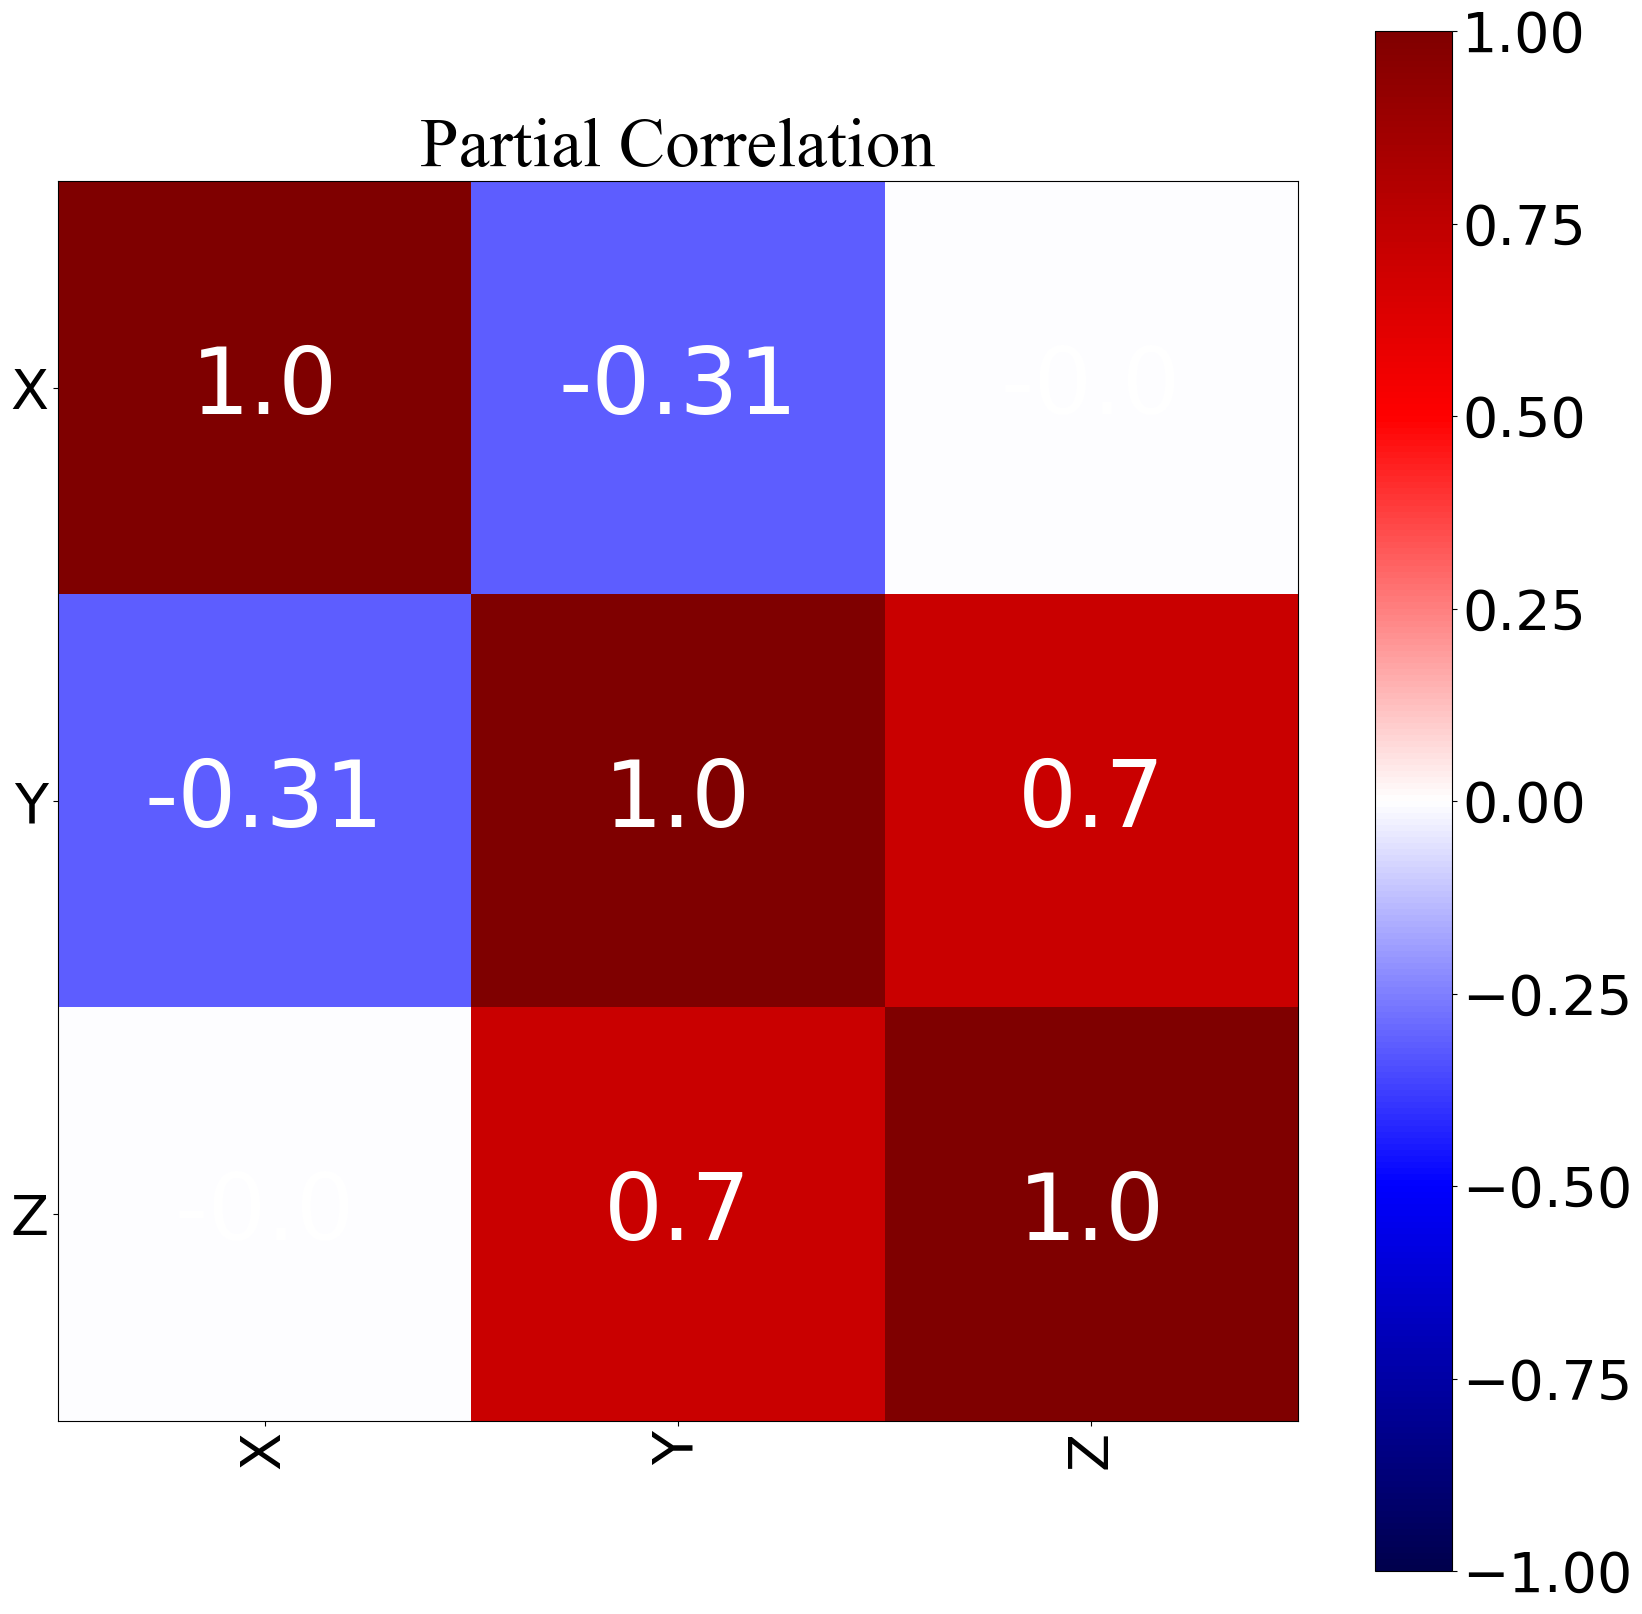

In [11]:
corr_matrix_heatmap(chain_pcorr,
                    save_fig = False,
                    pp = None,
                    title = "Partial Correlation")

In [12]:
# !pip install pingouin
import pingouin
chain.pcorr().round(3)


X      Y      Z
X  1.000 -0.314 -0.004
Y -0.314  1.000  0.705
Z -0.004  0.705  1.000

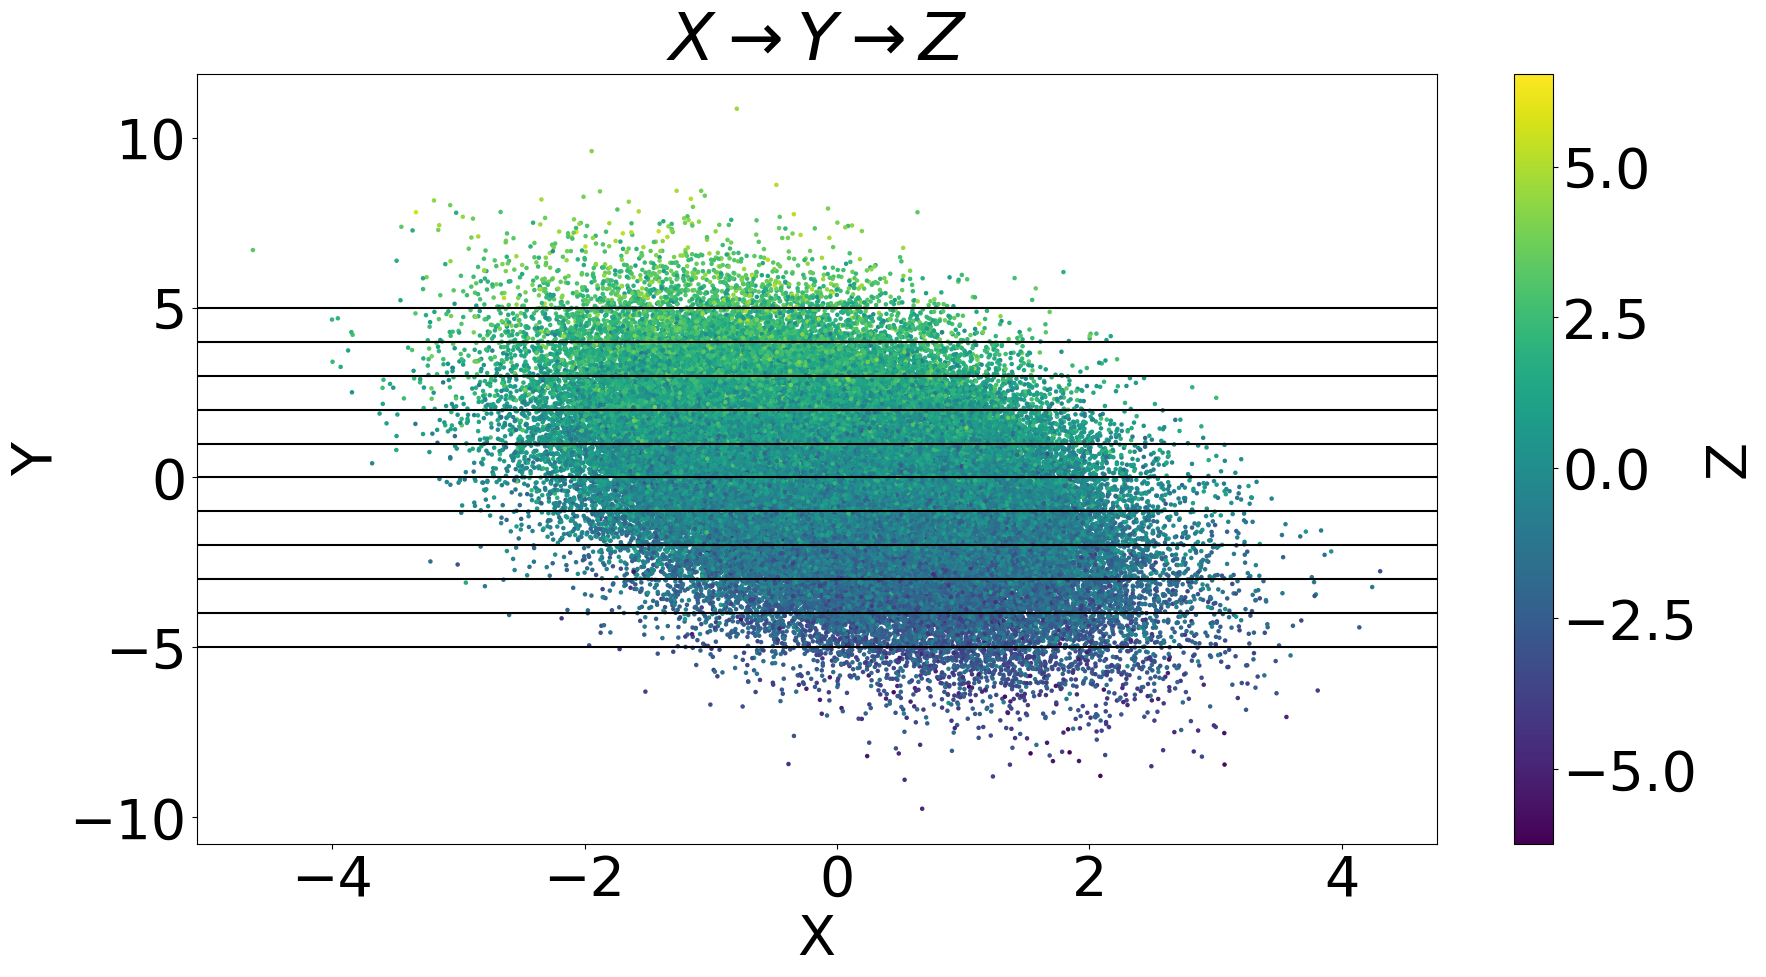

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
chain.plot.scatter(x = "X", y = "Y", c = "Z", cmap = "viridis", s = 5, ax = ax)
ax.set_title("$X \\rightarrow Y \\rightarrow Z$")
for i in range(-5, 6): ax.axhline(i, c = "k")

## Forks

 $Y\leftarrow X \rightarrow Z$

In [24]:
G = nx.DiGraph()
G.add_edges_from([("X", "Y"), ("X", "Z")])
pos = nx.spring_layout(G)

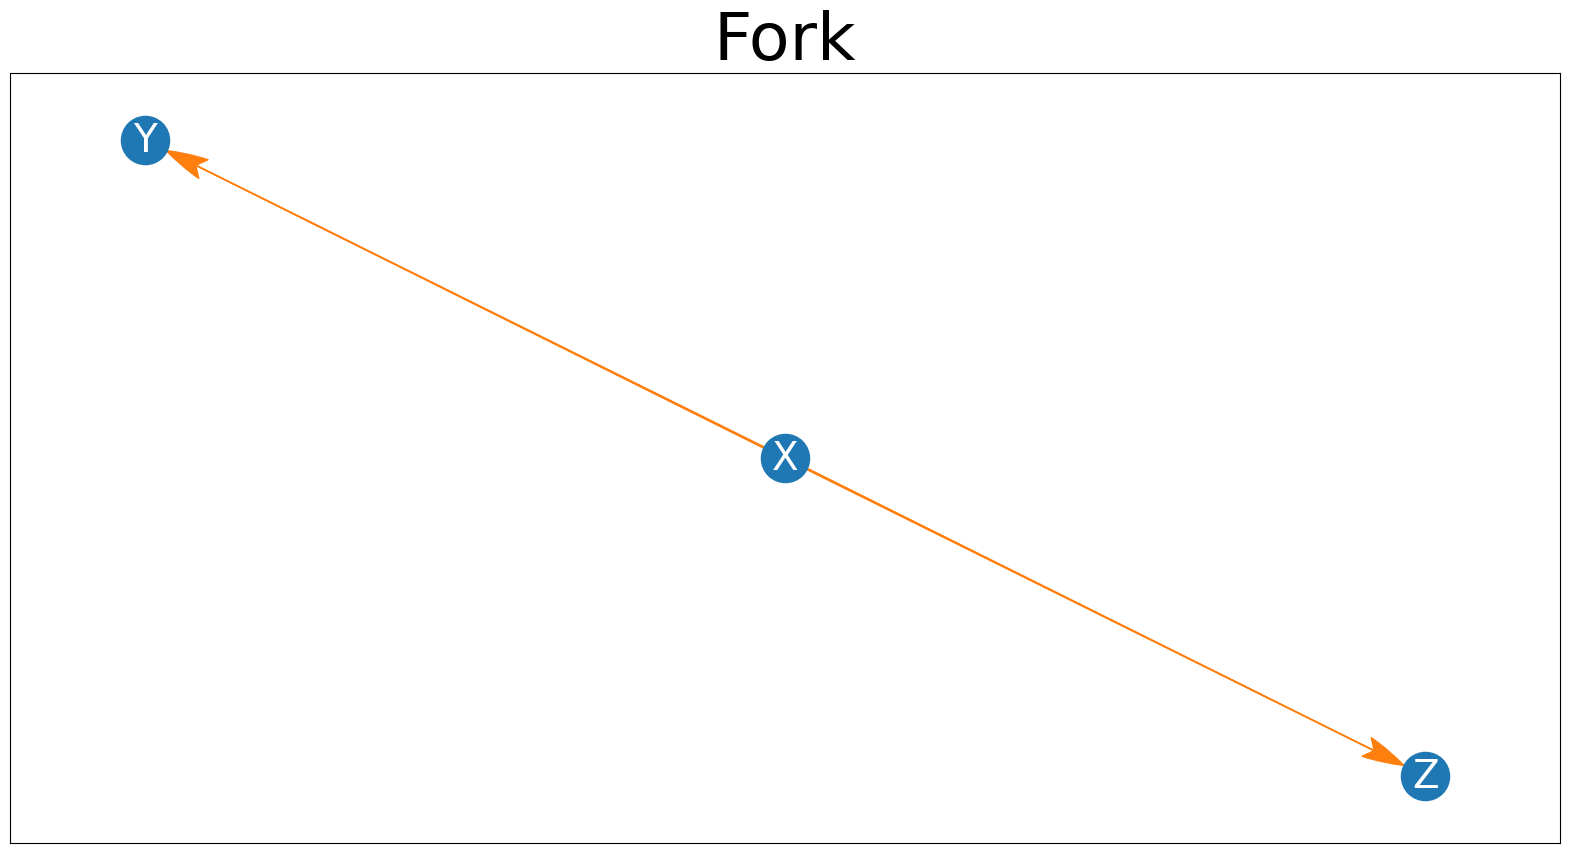

In [25]:
def plot_network(G, pos, title ="", node_size = 1200, 
                 font_color = "white",
                 font_size = 28,
                 alpha = 1, 
                 width = 1, 
                 edge_color = "C1"):
    fig, ax = plt.subplots(figsize = (20,10))
    nx.draw_networkx(G, pos, node_size = node_size,
                     with_labels = True, arrows = True,
                     font_color = font_color,
                     font_size = font_size, alpha = alpha,
                     width = width, edge_color = edge_color,
                     arrowstyle = ArrowStyle(
                         "Fancy, head_length=3, head_width=1.5, tail_width=.1"),
                     ax = ax)
    ax.set_title(title)
plot_network(G, pos, "Fork")

### Create a Fork

In [33]:
fork = {col:[] for col in cols}
for i in range(length):
    fork["X"].append(np.random.normal(0,1))
    fork["Y"].append(fork["X"][-1] + np.random.normal(0,1))
    fork["Z"].append(fork
                     ["X"][-1] *2 + np.random.normal(0,1))
fork = pd.DataFrame(fork)
fork

X         Y         Z
0      1.435402  2.255761  5.157786
1     -0.822618 -1.836807 -0.816258
2      0.458217 -0.300514  2.522155
3     -1.145796 -1.250724 -3.508007
4     -0.881788 -2.149686 -0.334759
...         ...       ...       ...
99995  0.684403  0.872974  1.684119
99996  1.319335  0.228972  2.524426
99997 -1.095418 -0.969819 -2.311104
99998  1.752210  4.206264  3.758538
99999  0.520261  1.073481  1.285096

[100000 rows x 3 columns]

In [34]:
fork.corr()

X         Y         Z
X  1.000000  0.705060  0.893876
Y  0.705060  1.000000  0.629925
Z  0.893876  0.629925  1.000000

In [35]:
XZc = fork[["X", "Z"]]
XZc["Constant"] = 1
Y = fork[["Y"]]
# pass y_var as list for consistent structure
model = sm.OLS(Y, XZc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                 4.942e+04
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:33:42   Log-Likelihood:            -1.4208e+05
No. Observations:              100000   AIC:                         2.842e+05
Df Residuals:                   99997   BIC:                         2.842e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              1.0021      0.007    141.227      0.000       0.988       1.016
Z             -0.0010      0.003     -0.310      0.757      -0.007       0.005
Constant      -0.0066      0.003     -2.077      0.038      -0.013      -0.000
==============================================================================
Omnibus:                        1.433   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                1.442
Skew:                           0.006   Prob(JB):                        0.486
Kurtosis:                       2.985   Cond. No.                         5.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
fork.pcorr()

X         Y         Z
X  1.000000  0.407786  0.816578
Y  0.407786  1.000000 -0.000980
Z  0.816578 -0.000980  1.000000

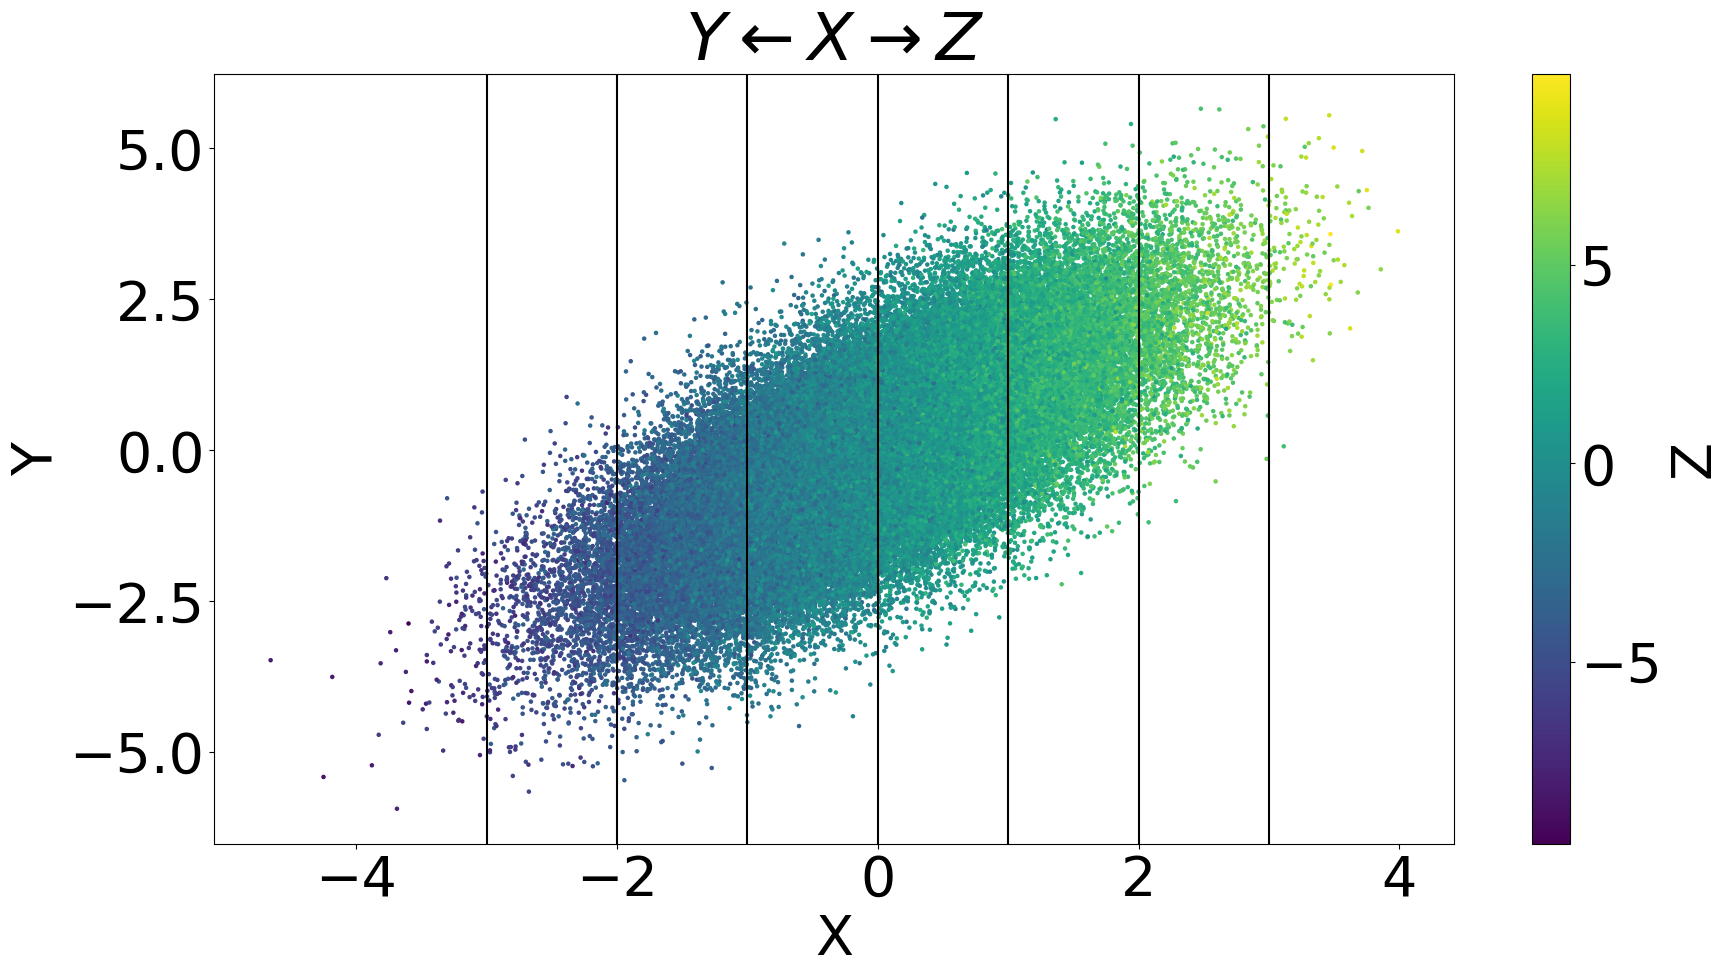

In [43]:
fig, ax = plt.subplots(figsize = (20,10))
fork.plot.scatter(x = "X", y = "Y", c = "Z",
                  s = 5, cmap = "viridis", ax = ax)
ax.set_title("$Y \\leftarrow X \\rightarrow Z$")
for i in range(-3,4): ax.axvline(i, c="k")

## Colliders

$$Y \rightarrow X \leftarrow Z$$

In [44]:
collider = {col:[] for col in cols}
for i in range(length):
    collider["Y"].append(np.random.normal(0,1))
    collider["Z"].append(np.random.normal(0,1))
    collider["X"].append(collider["Y"][-1] * -.5 + collider["Z"][-1] * .5 + np.random.normal(0,1))
collider = pd.DataFrame(collider)
collider

X         Y         Z
0     -0.251141 -0.940478 -1.415821
1      2.068272 -1.150095 -0.552579
2      1.066120  0.043915 -0.795361
3      1.566191 -0.836351 -0.121483
4      0.834864 -0.866310  0.285567
...         ...       ...       ...
99995  2.059167  0.033015  0.965061
99996  0.853944 -0.203623  1.289403
99997 -1.056919 -0.091423 -0.336953
99998  0.717677 -0.548503 -0.265054
99999  0.824432 -1.286273  0.348480

[100000 rows x 3 columns]

In [45]:
collider.corr()

X         Y        Z
X  1.000000 -0.412348  0.40800
Y -0.412348  1.000000 -0.00126
Z  0.408000 -0.001260  1.00000

In [47]:
YZc = collider[["Y", "Z"]]
YZc["Constant"] = 1
X = collider[["X"]]
model = sm.OLS(X, YZc)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      X   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                 2.531e+04
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        13:47:00   Log-Likelihood:            -1.4211e+05
No. Observations:              100000   AIC:                         2.842e+05
Df Residuals:                   99997   BIC:                         2.843e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Y             -0.5063      0.003   -159.829      0.000      -0.513      -0.500
Z              0.5031      0.003    158.139      0.000       0.497       0.509
Constant      -0.0003      0.003     -0.090      0.928      -0.006       0.006
==============================================================================
Omnibus:                        1.401   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                1.396
Skew:                          -0.009   Prob(JB):                        0.498
Kurtosis:                       3.004   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
collider.pcorr()

X         Y         Z
X  1.000000 -0.451087  0.447276
Y -0.451087  1.000000  0.200755
Z  0.447276  0.200755  1.000000

Text(0.5, 1.0, '$Y \\rightarrow X \\leftarrow Z$')

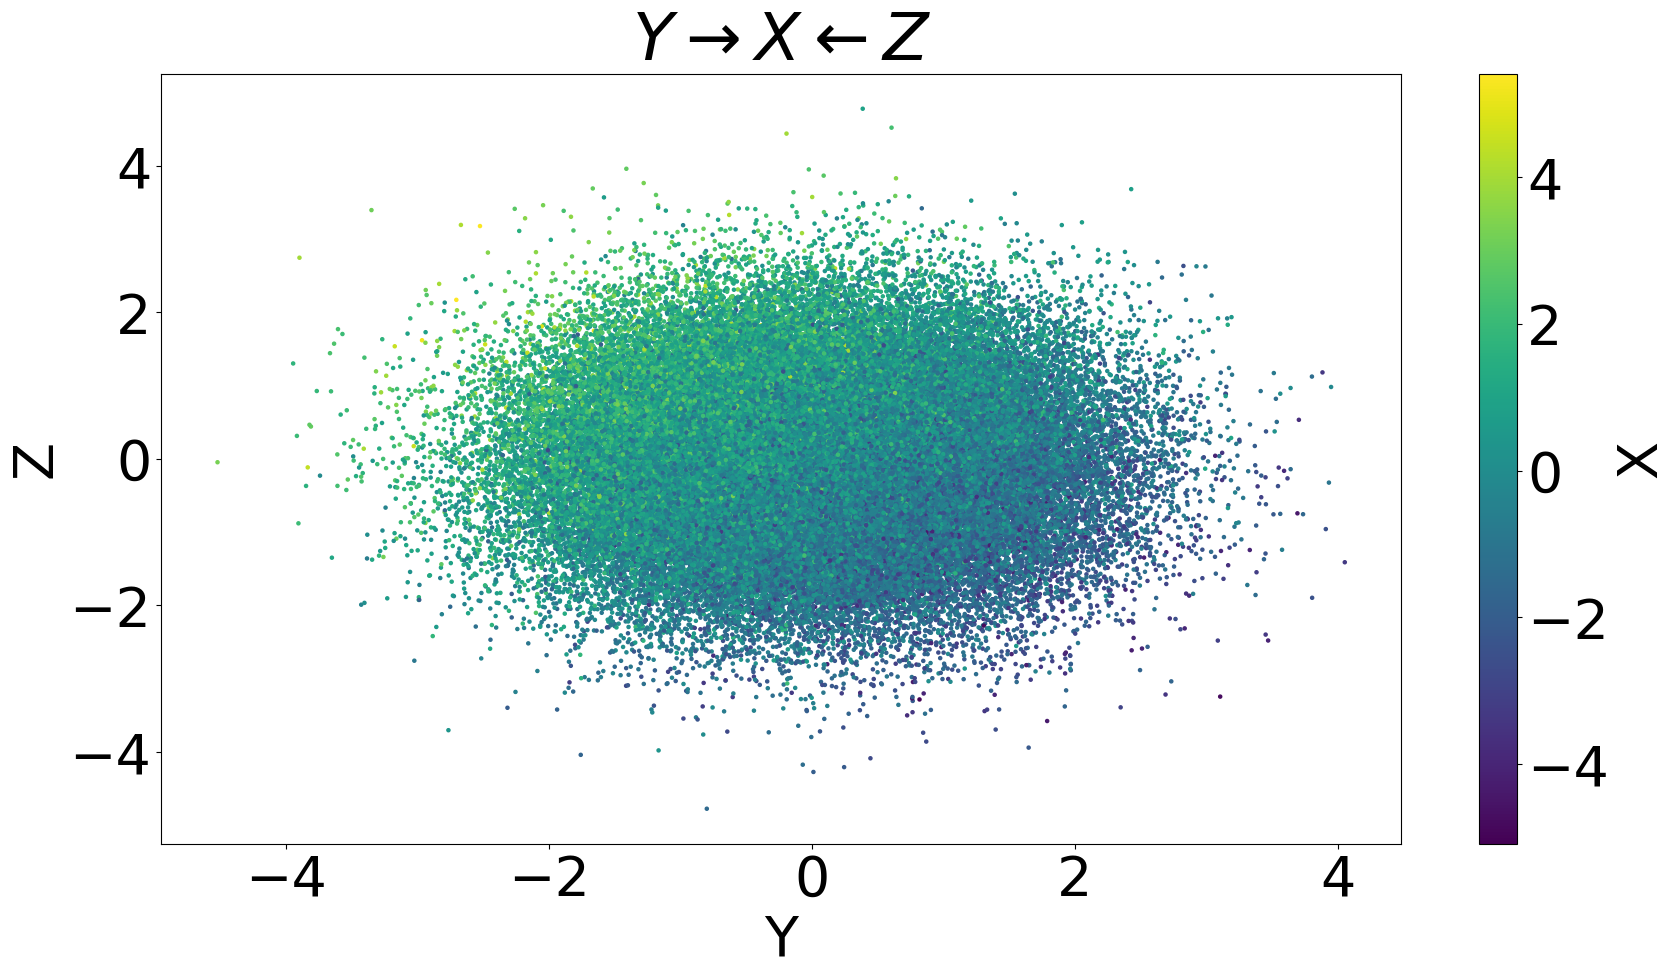

In [49]:
fig,ax = plt.subplots(figsize = (20,10))
collider.plot.scatter(x = "Y", y = "Z", c = "X",s = 5, cmap = "viridis", ax = ax)
ax.set_title("$Y \\rightarrow X \\leftarrow Z$")

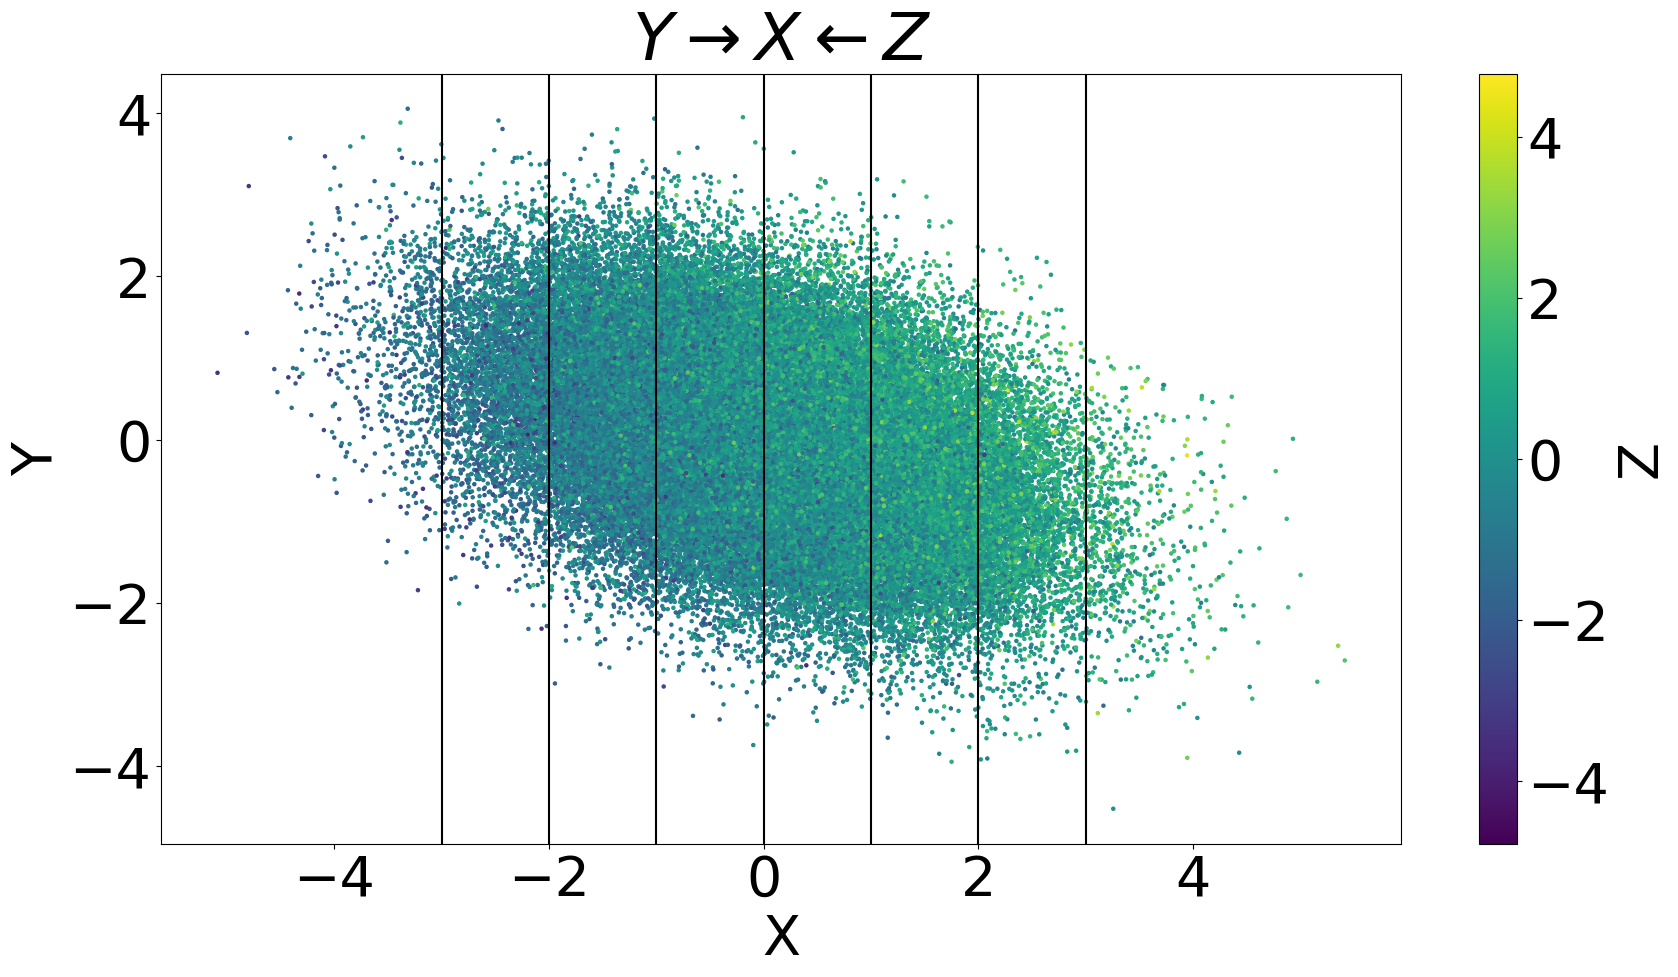

In [51]:
fig,ax = plt.subplots(figsize = (20,10))
collider.plot.scatter(x = "X", y = "Y", c = "Z",s = 5, cmap = "viridis", ax = ax)
ax.set_title("$Y \\rightarrow X \\leftarrow Z$")
for i in range(-3,4): ax.axvline(i, c = "k")

## Problems with Confounding

### Backdoor

In [52]:
G = nx.DiGraph()
G.add_edges_from([("Q", "X"), ("Q", "Y"), ("X", "Z"), ("Y","Z")])
pos = nx.spring_layout(G)

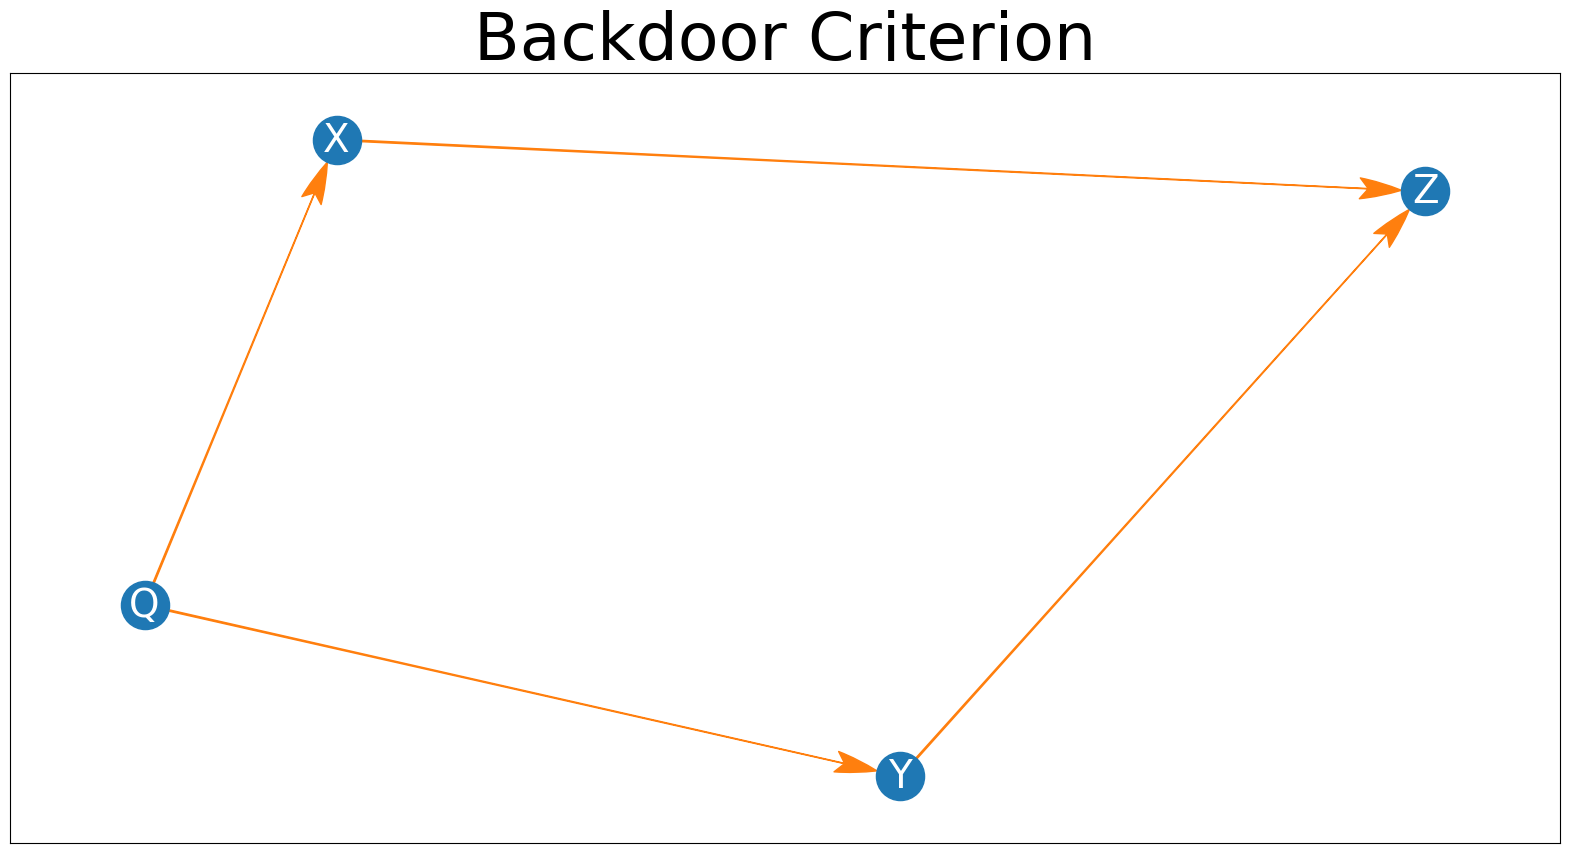

In [60]:
plot_network(G, pos, "Backdoor Criterion")

In [63]:
cols = ["Q", "X", "Y", "Z"]
mu = 0
sigma = 1

backdoor = {col:[] for col in cols}
for i in range(length):
    backdoor["Q"].append(np.random.normal(mu, sigma))
    backdoor["X"].append(3 * backdoor["Q"][-1] + np.random.normal(mu, sigma))
    backdoor["Y"].append(-1 * backdoor["Q"][-1] + np.random.normal(mu, sigma))
    backdoor["Z"].append(1.5 * backdoor["X"][-1] + backdoor["Y"][-1] * -2 + np.random.normal(mu, sigma))
backdoor = pd.DataFrame(backdoor)
backdoor

Q         X         Y          Z
0     -2.206154 -7.362078  2.525675 -15.783084
1      0.692149  2.180586  0.938515   2.325444
2      1.067900  1.586954 -2.688387   8.150672
3      0.919610  2.659086  0.406094   4.477237
4     -0.283155 -0.743479 -1.610712   2.305663
...         ...       ...       ...        ...
99995  0.884029  1.619508 -0.570967   3.687261
99996  0.322239  0.066970 -0.420208   0.445886
99997 -2.573028 -7.812907  2.723919 -16.638029
99998  0.542899  0.354098 -0.304463   1.402876
99999  0.505617  1.193787 -0.664287   2.843103

[100000 rows x 4 columns]

In [67]:
QXYc = backdoor[["Q", "X","Y"]]
QXYc["Constant"] = 1
Z = backdoor[["Z"]]
# pass y_var as list for consistentj structure
model = sm.OLS(Z, QXYc)
results = model.fit()
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_14560\2626230673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  QXYc["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Z   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.624e+06
Date:                Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:14:09   Log-Likelihood:            -1.4191e+05
No. Observations:              100000   AIC:                         2.838e+05
Df Residuals:                   99996   BIC:                         2.839e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0030      0.011      0.282      0.778      -0.018       0.024
X              1.4996      0.003    473.464      0.000       1.493       1.506
Y             -2.0005      0.003   -633.523      0.000      -2.007      -1.994
Constant       0.0058      0.003      1.842      0.065      -0.000       0.012
==============================================================================
Omnibus:                        1.310   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                1.298
Skew:                           0.007   Prob(JB):                        0.522
Kurtosis:                       3.011   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""